In [72]:
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D, Flatten, 
                                     Dense, Dropout, BatchNormalization)
import numpy as np
import matplotlib.pyplot as plt 
# get mnist fashion dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [73]:
# normalize/scale the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_train = np.expand_dims(x_train, axis=-1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
#x_test = np.expand_dims(x_test, axis=-1)

In [74]:
labels =["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [75]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4692 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3553 - accuracy: 0.8697
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3193 - accuracy: 0.8799
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2939 - accuracy: 0.8898
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2762 - accuracy: 0.8959
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2578 - accuracy: 0.9020
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2432 - accuracy: 0.9075
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2334 - accuracy: 0.9116
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2226 - accuracy: 0.9143
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [76]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8805
0.34532007575035095 0.8805000185966492


In [77]:
predictions = model.predict([x_test])

Consider rewriting this model with the Functional API.


4 Label = Coat


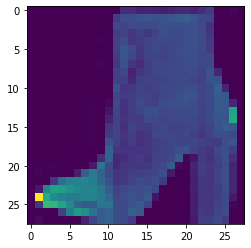

In [80]:

predict_val = 659
print(f"{np.argmax(predictions[predict_val])} Label = {labels[np.argmax(predictions[predict_val])]}")
plt.imshow(x_train[predict_val])
plt.show()

Numpy is used to calculate the probability distribution. 3 dense layers trained for 10 epochs seems to give the best performance measure. We track the Accuracy metric, it is the fraction of predictions our model got right. 
This is done to evaluate the model on the primary task which is to correctly classify the fashion mnist data. 